In [1]:
from matplotlib import pyplot as plt
from tqdm import tqdm

from src.utils.visualization.visualization_utils import set_size, load_colors, initialize_plot
%load_ext autoreload
%autoreload 2
from pyrootutils import pyrootutils
from hydra import initialize, compose
from os import path
import os
root = pyrootutils.setup_root(os.path.abspath(''), indicator=".project-root", pythonpath=True)

from src.systems.systems.dynamic_system import VanDerPolType
from src.utils.visualization.run_plotter import RunPlotter, MultiRunPlotter
from src.systems.runner.predict_test_runner import PredictTestRunner
from src.systems.enviroment.trajectory_replay_env import TrajectoryReplay
from src.data.dataset.base import BasePckHdf5Loader
from src.modules.nd_cnp import NdCNP
from src.systems.predictor.moving_window_nn_predictor import MovingWindowNNPredictor
from src.systems.systems.NNModel import NNModel
import pickle
from typing import List
from src.systems.runner.predict_test_runner import EnvRunResult
import torch
from src.systems.systems.dynamic_system import InvertedPendulumType

config_path = os.path.relpath(os.path.join(root, "configs"), os.path.abspath(''))
with initialize(version_base=None, config_path=config_path):
    cfg = compose(overrides=[], config_name="notebook")

c = load_colors()
params = initialize_plot('README')  # specifies font size etc., adjust accordingly
plt.rcParams.update(params)

Total mean error for 5: 0.026460697874426842
Total mean error for 20: 0.020438387989997864
Total mean error for 50: 0.01969408616423607
Total mean error for 70: 0.02037239633500576
Total mean error for 100: 0.02164887823164463
Total mean error for 200: 0.02631894126534462
Total mean error for 300: 0.031072501093149185


/mnt/c/Users/paulk/PycharmProjects/ma-dsme/src/utils/visualization/run_plotter.py:206: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


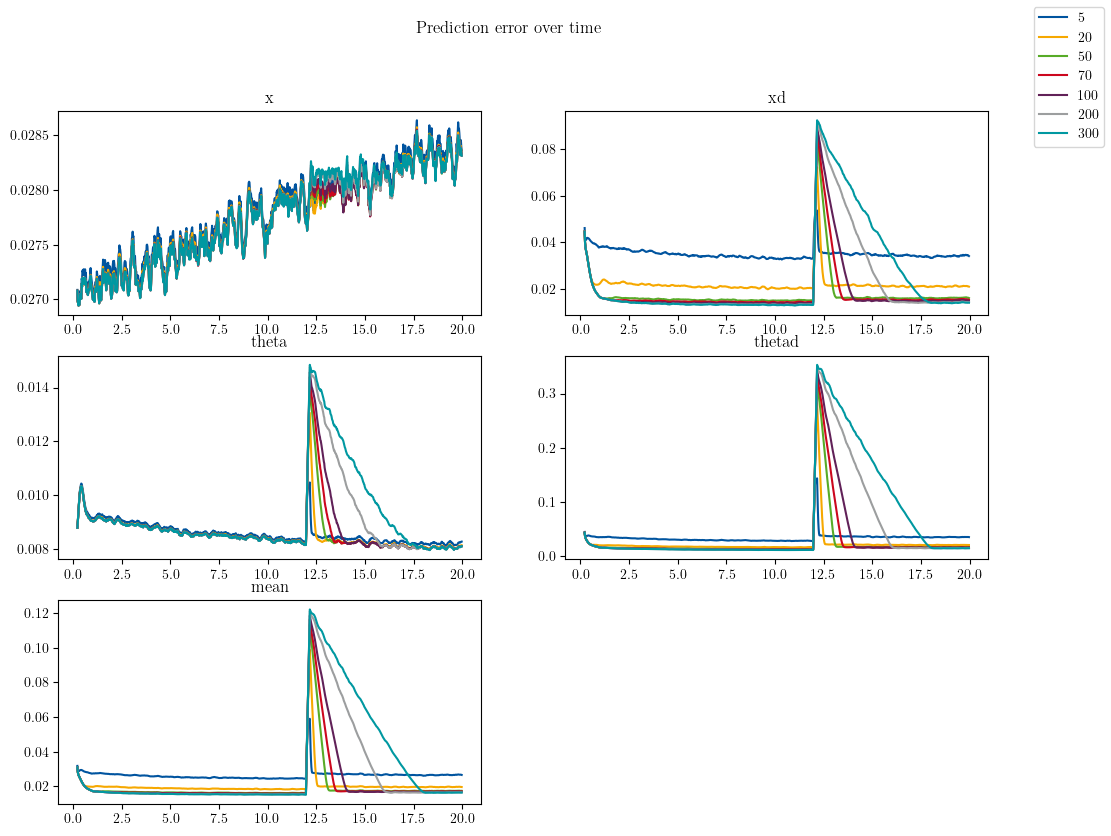

In [2]:


#With process noise 0.01 * magnitude
#With 0.001 observation noise
#With random control
#Sweep über window size

plotter = MultiRunPlotter(InvertedPendulumType())
runs = plotter.load_pkl([
    os.path.join(cfg.paths.log_dir, "invP_eval/ETL/winSizeSweep_diffVarParameter/pred-test-varLmM-rC/multiruns/2023-07-03_17-39-48/winSize_5/predictor_test_winSizeSweep_results.pkl"),
    os.path.join(cfg.paths.log_dir, "invP_eval/ETL/winSizeSweep_diffVarParameter/pred-test-varLmM-rC/multiruns/2023-07-03_17-39-48/winSize_20/predictor_test_winSizeSweep_results.pkl"),
    os.path.join(cfg.paths.log_dir, "invP_eval/ETL/winSizeSweep_diffVarParameter/pred-test-varLmM-rC/multiruns/2023-07-03_17-39-48/winSize_50/predictor_test_winSizeSweep_results.pkl"),
    os.path.join(cfg.paths.log_dir, "invP_eval/ETL/winSizeSweep_diffVarParameter/pred-test-varLmM-rC/multiruns/2023-07-03_17-39-48/winSize_70/predictor_test_winSizeSweep_results.pkl"),
    os.path.join(cfg.paths.log_dir, "invP_eval/ETL/winSizeSweep_diffVarParameter/pred-test-varLmM-rC/multiruns/2023-07-03_17-39-48/winSize_100/predictor_test_winSizeSweep_results.pkl"),
    os.path.join(cfg.paths.log_dir, "invP_eval/ETL/winSizeSweep_diffVarParameter/pred-test-varLmM-rC/multiruns/2023-07-03_17-39-48/winSize_200/predictor_test_winSizeSweep_results.pkl"),
    os.path.join(cfg.paths.log_dir, "invP_eval/ETL/winSizeSweep_diffVarParameter/pred-test-varLmM-rC/multiruns/2023-07-03_17-39-48/winSize_300/predictor_test_winSizeSweep_results.pkl"),

])

plotter.plot_error_over_time(runs, labels=["5", "20", "50", "70", "100", "200", "300"], std=False, move_avg=10, normalize=True)

Window size von 200-300 bringen deutlich mehr.

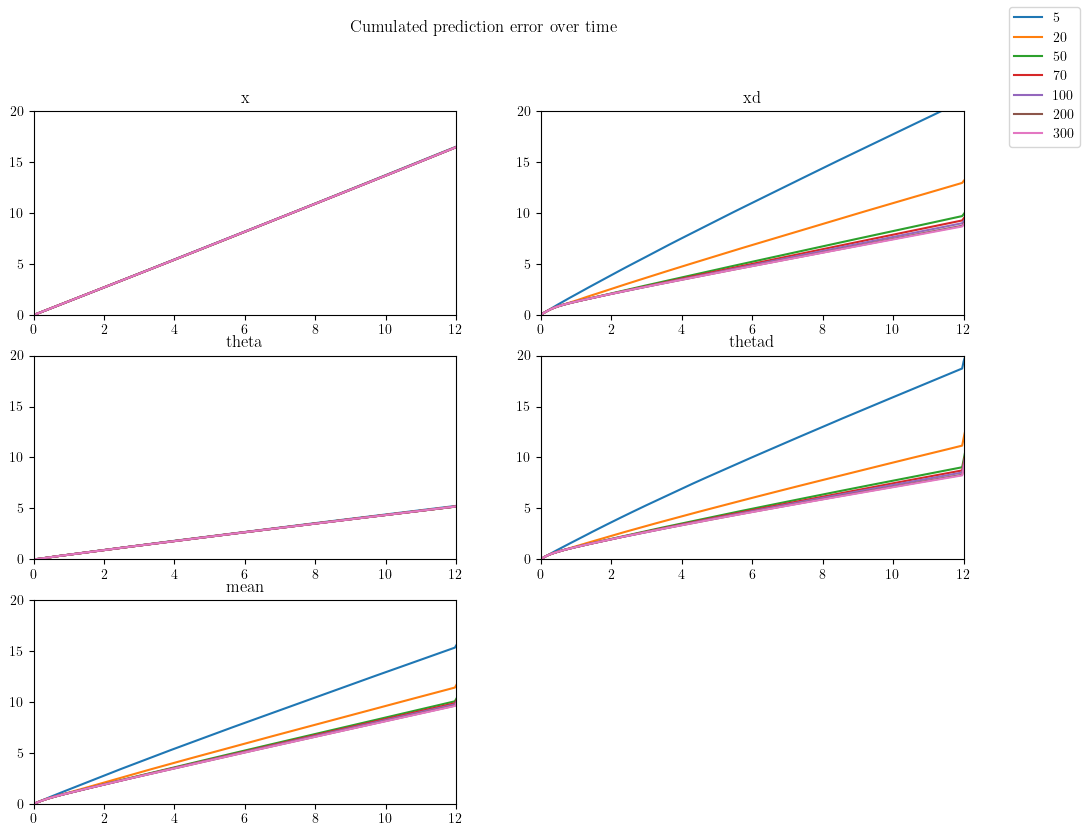

In [21]:
plotter.plot_cum_error_over_time(runs, labels=["5", "20", "50", "70", "100", "200", "300"], std=False, y_axis_limits=(0, 20), x_axis_limits=(0, 12), normalize=True)


Make beautiful plots for the midterm presentation

In [3]:
plotter = MultiRunPlotter(VanDerPolType())
runs = plotter.load_pkl([
    os.path.join(cfg.paths.log_dir, "invP_eval/ETL/winSizeSweep_diffVarParameter/pred-test-varLmM-rC/multiruns/2023-07-03_17-39-48/winSize_5/predictor_test_winSizeSweep_results.pkl"),
    os.path.join(cfg.paths.log_dir, "invP_eval/ETL/winSizeSweep_diffVarParameter/pred-test-varLmM-rC/multiruns/2023-07-03_17-39-48/winSize_20/predictor_test_winSizeSweep_results.pkl"),
    os.path.join(cfg.paths.log_dir, "invP_eval/ETL/winSizeSweep_diffVarParameter/pred-test-varLmM-rC/multiruns/2023-07-03_17-39-48/winSize_50/predictor_test_winSizeSweep_results.pkl"),
    os.path.join(cfg.paths.log_dir, "invP_eval/ETL/winSizeSweep_diffVarParameter/pred-test-varLmM-rC/multiruns/2023-07-03_17-39-48/winSize_70/predictor_test_winSizeSweep_results.pkl"),
    os.path.join(cfg.paths.log_dir, "invP_eval/ETL/winSizeSweep_diffVarParameter/pred-test-varLmM-rC/multiruns/2023-07-03_17-39-48/winSize_100/predictor_test_winSizeSweep_results.pkl"),
    os.path.join(cfg.paths.log_dir, "invP_eval/ETL/winSizeSweep_diffVarParameter/pred-test-varLmM-rC/multiruns/2023-07-03_17-39-48/winSize_200/predictor_test_winSizeSweep_results.pkl"),
    os.path.join(cfg.paths.log_dir, "invP_eval/ETL/winSizeSweep_diffVarParameter/pred-test-varLmM-rC/multiruns/2023-07-03_17-39-48/winSize_300/predictor_test_winSizeSweep_results.pkl"),

])

(5.507126055071261, 4.095441089282665)


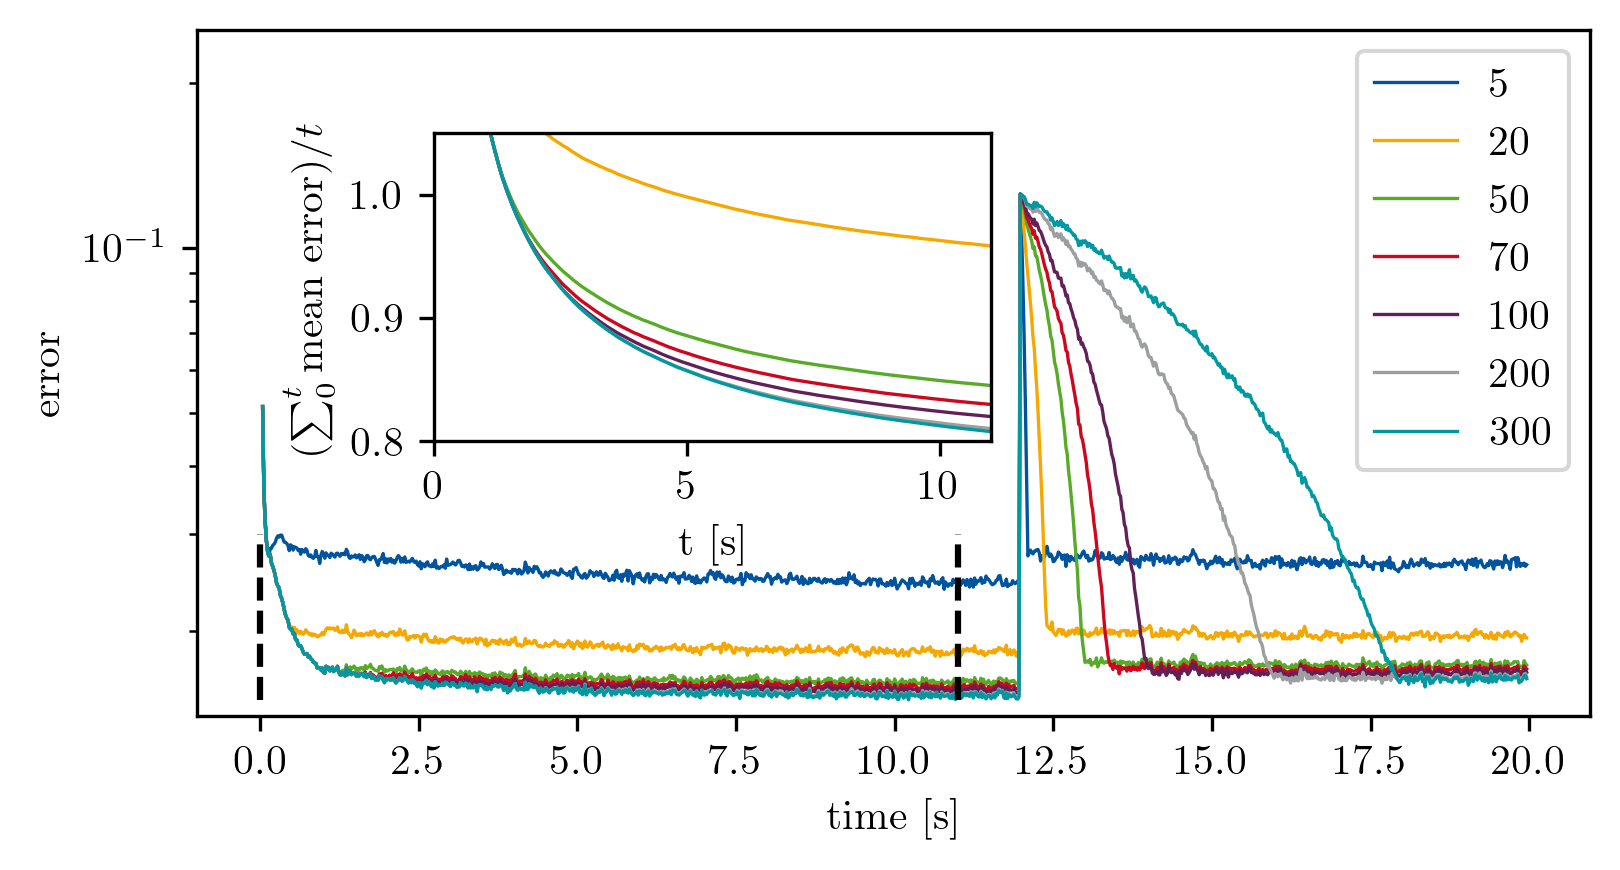

In [4]:

delta_t = 0.02
linewidth= 0.8
labels = ["5", "20", "50", "70", "100", "200", "300"]
print(set_size(width_pt=398, fraction=1, subplots=(1, 1)))
fig, ax = plt.subplots(1, 1, figsize=(5.5, 3), dpi=300)
ax.set_xlabel("time [s]")
ax.set_ylabel("error")
ax.set_yscale("log")
ax.set_ylim(0.014, 0.25)
cum_axs = ax.inset_axes([0.17,0.4,0.4,0.45])
cum_axs.set_xlabel("t [s]")
cum_axs.set_ylabel("$(\sum_0^t \\text{mean error}) / t$")
cum_axs.set_xlim(0, 11)
cum_axs.set_ylim(0.8, 1.05)
#cum_axs.set_yscale("log")
time = torch.arange(2 * delta_t, runs[0][0].prediction.error.toSystem.size(0) * delta_t, delta_t)

to_pickle_data = {"time": time,
                  "error": [],
                  "cum_error": [],
                  "labels": labels,}
for i, run in enumerate(runs):
    errors = [res.prediction.error.toSystem for res in run]
    errors = torch.stack(errors)
    errors  = errors / torch.tensor(InvertedPendulumType().inc_std)
    errors = errors[:, 2:]
    mean = errors.mean(dim=(0,2))
    ax.plot(time, mean, label=labels[i], linewidth=linewidth)

    cum_means = mean.cumsum(dim=0)
    time_normalized_cum_means = cum_means / time
    cum_axs.plot(time, time_normalized_cum_means, label=labels[i], linewidth=linewidth)
    
    to_pickle_data["error"].append(mean)
    to_pickle_data["cum_error"].append(time_normalized_cum_means)

ax.vlines(0, min(mean), 0.03, color="black", linestyle="dashed")
ax.vlines(11, min(mean), 0.03, color="black", linestyle="dashed")

ax.legend()
fig.tight_layout()
fig.savefig("/tmp/oneChangeLarge-invP-winSizeSweep.pdf")

with open("/tmp/oneChangeLarge-invP-winSizeSweep.pkl", "wb") as f:
    pickle.dump(to_pickle_data, f)

In [2]:
plotter = MultiRunPlotter(InvertedPendulumType())
res = plotter.load_pkl([
    os.path.join(cfg.paths.log_dir, "invP_eval/ETL/pred/varLmM_normal_nn/runs/2023-10-20_19-23-00/predictor_test__results.pkl.gzip"),
    os.path.join(cfg.paths.log_dir, "invP_eval/ETL/pred/varLmM-win20/runs/2023-07-26_21-21-58/predictor_test__results.pkl.gzip"),
    #os.path.join(cfg.paths.log_dir, "invP_eval/ETL/pred/varLmM-win100-chernoff0.999/runs/2023-07-26_21-21-58/predictor_test__results.pkl.gzip"),
    os.path.join(cfg.paths.log_dir, "invP_eval/ETL/pred/varLmM-win300-exactReset/runs/2023-07-26_21-21-57/predictor_test__results.pkl.gzip"),
    os.path.join(cfg.paths.log_dir, "invP_eval/ETL/pred/varLmM-win100-srini0.999/multiruns/2023-12-04_21-43-55/0/predictor_test__results.pkl.gzip"),
    os.path.join(cfg.paths.log_dir, "invP_eval/ETL/pred/varLmM-win100-srini0.95tA/multiruns/2023-12-04_21-42-37/0/predictor_test__results.pkl.gzip"),
    #os.path.join(cfg.paths.log_dir, "invP_eval/ETL/pred/varLmM-win100-norm_sum999/multiruns/2023-12-16_17-10-27/0/predictor_test__results.pkl.gzip"),
    #os.path.join(cfg.paths.log_dir, "invP_eval/ETL/pred/varLmM-win100-norm_sum95_tA/multiruns/2023-12-05_22-14-16/0/predictor_test__results.pkl.gzip"),
    os.path.join(cfg.paths.log_dir, "invP_eval/ETL/pred/varLmM-win100-norm_sum_tight999/multiruns/2023-12-13_19-47-27/0/predictor_test__results.pkl.gzip"),
    os.path.join(cfg.paths.log_dir, "invP_eval/ETL/pred/varLmM-win100-norm_sum_tight95_tA/multiruns/2023-12-13_19-47-52/0/predictor_test__results.pkl.gzip"),
],
    run_idx=None)

(5.507126055071261, 2.3936455481005825)


/tmp/ipykernel_14042/991201060.py:55: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


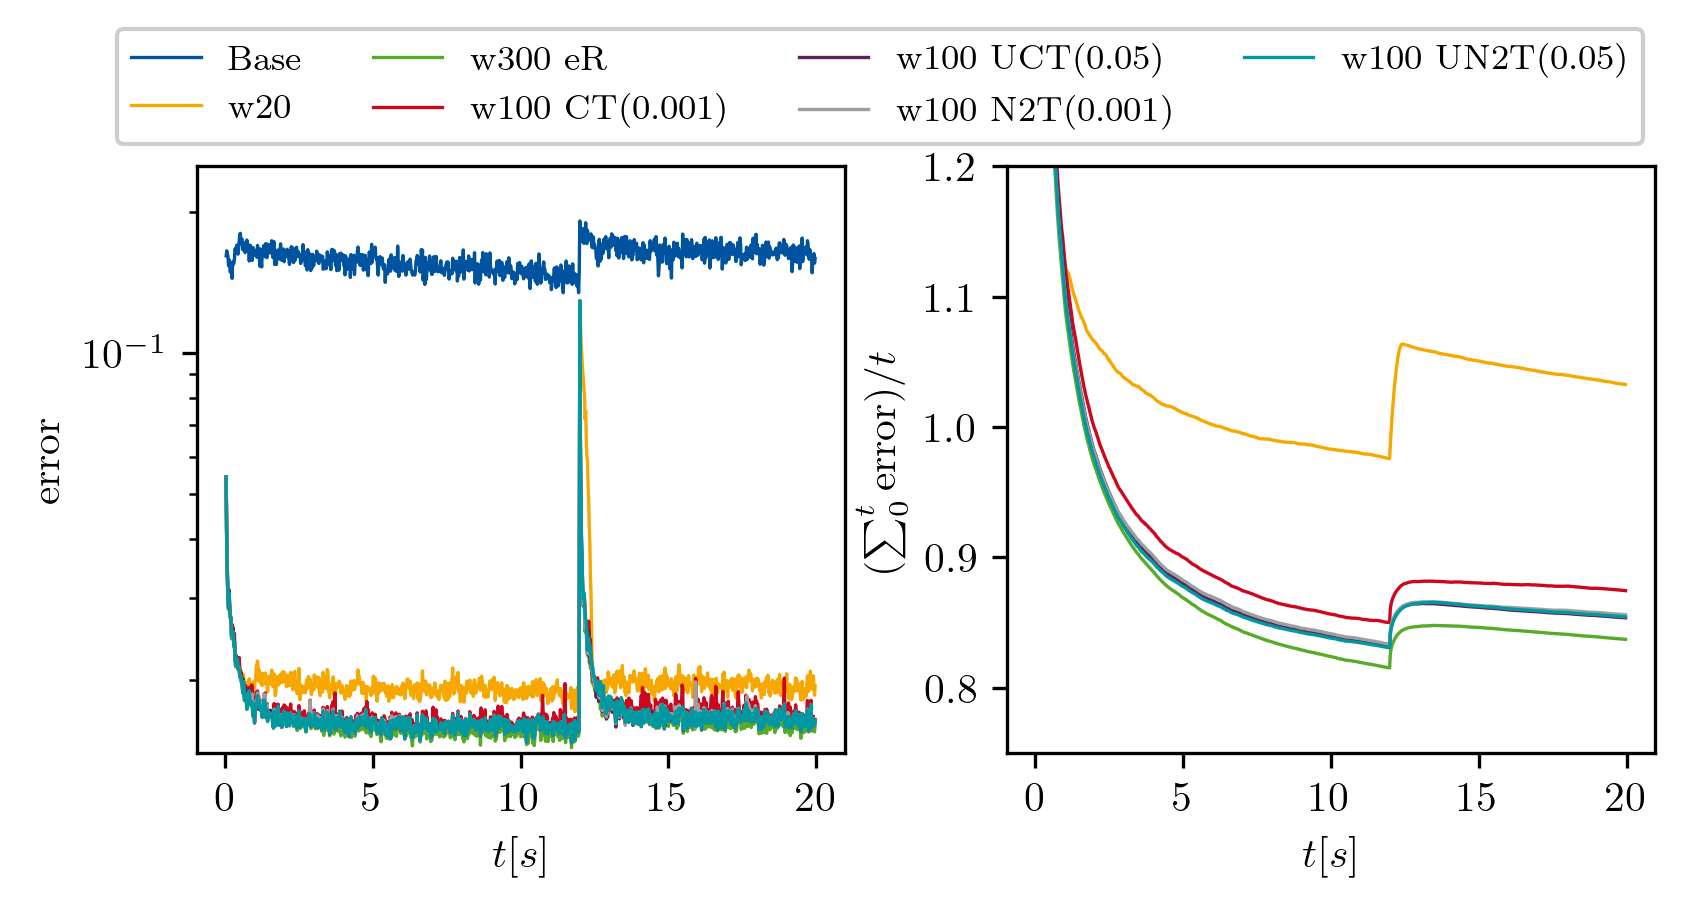

In [3]:


delta_t = 0.02

linewidth= 0.8
size = set_size(width_pt=398, fraction=1.0, subplots=(1, 2))
print(size)
size = (5.5, 2.5)
fig, axs = plt.subplots(1, 2 , figsize=size, dpi=300)
labels = ["Base", "w20", "w300 eR", "w100 CT(0.001)", "w100 UCT(0.05)", "w100 N2T(0.001)", "w100 UN2T(0.05)"]
time = torch.arange(2 * delta_t, res[0][0].prediction.error.toSystem.size(0) * delta_t, delta_t)
data = []
error_axs = axs[0]
cum_axs = axs[1]
#cum_axs.set_xlim(10, 15)
cum_axs.set_ylim(0.75, 1.2)
cum_axs.set_ylabel("$(\sum_0^t \\text{error})/t$")
cum_axs.set_xlabel("$t [s]$")
#zoom_axs.set_yticks([])

to_pickle_data = {"time": time,
                  "error": [],
                  "cum_error": [],
                  "labels": labels}

i = 0
for run, label in zip(res, labels):
    error = torch.stack([res.prediction.error.toSystem for res in run])
    error = error[:, 2:]  # remove first and second steps because the costs can sometime only be calculated after the first step
    
    error  = error / torch.tensor(InvertedPendulumType().inc_std)
    
    mean = error.mean(dim=(0, 2))

    error_axs.plot(time, mean, label=label, linewidth=linewidth)

    cum_mean = mean.cumsum(dim=0)
    time_normalized_cum_mean = cum_mean / time

    cum_axs.plot(time, time_normalized_cum_mean, linewidth=linewidth)
    
    to_pickle_data["error"].append(mean)
    to_pickle_data["cum_error"].append(time_normalized_cum_mean)
    i += 1

error_axs.set_yscale("log")
error_axs.set_ylim(0.014, 0.25)
error_axs.set_xlabel("$t [s]$")
error_axs.set_ylabel("error")
fig.legend(loc='upper left', bbox_to_anchor=(0.05, 1.17),
           ncol=4, fontsize="small",
           #handlelength=0.6,
           #columnspacing=0.2,
           #handletextpad=0.4,
           framealpha=0.95)
fig.tight_layout(pad=0.3)
fig.show()
fig.savefig("/tmp/invP_pred.pdf", bbox_inches='tight')

with open("/tmp/invP_pred.pkl", "wb") as f:
    pickle.dump(to_pickle_data, f)

(5.507126055071261, 2.3936455481005825)


/tmp/ipykernel_14042/4100690624.py:72: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


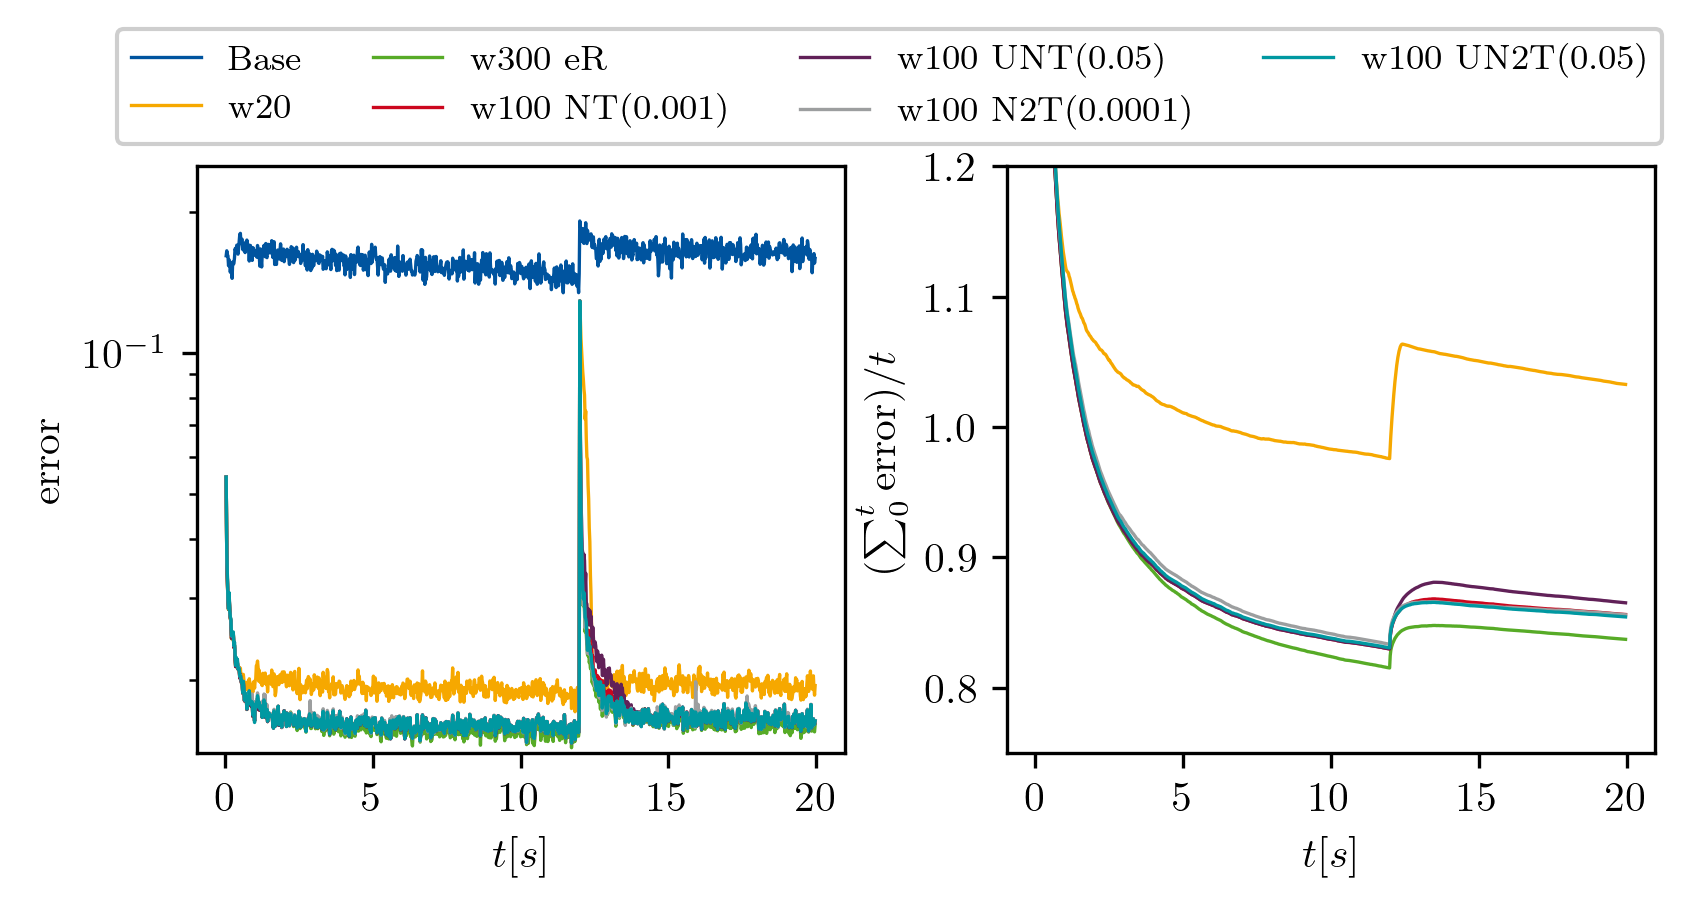

In [4]:
plotter = MultiRunPlotter(InvertedPendulumType())
res = plotter.load_pkl([
    os.path.join(cfg.paths.log_dir, "invP_eval/ETL/pred/varLmM_normal_nn/runs/2023-10-20_19-23-00/predictor_test__results.pkl.gzip"),
    os.path.join(cfg.paths.log_dir, "invP_eval/ETL/pred/varLmM-win20/runs/2023-07-26_21-21-58/predictor_test__results.pkl.gzip"),
    #os.path.join(cfg.paths.log_dir, "invP_eval/ETL/pred/varLmM-win100-chernoff0.999/runs/2023-07-26_21-21-58/predictor_test__results.pkl.gzip"),
    os.path.join(cfg.paths.log_dir, "invP_eval/ETL/pred/varLmM-win300-exactReset/runs/2023-07-26_21-21-57/predictor_test__results.pkl.gzip"),
    #os.path.join(cfg.paths.log_dir, "invP_eval/ETL/pred/varLmM-win100-srini0.999/multiruns/2023-12-04_21-43-55/0/predictor_test__results.pkl.gzip"),
    #os.path.join(cfg.paths.log_dir, "invP_eval/ETL/pred/varLmM-win100-srini0.95tA/multiruns/2023-12-04_21-42-37/0/predictor_test__results.pkl.gzip"),
    os.path.join(cfg.paths.log_dir, "invP_eval/ETL/pred/varLmM-win100-norm_sum999/multiruns/2023-12-16_17-10-27/0/predictor_test__results.pkl.gzip"),
    os.path.join(cfg.paths.log_dir, "invP_eval/ETL/pred/varLmM-win100-norm_sum95_tA/multiruns/2023-12-05_22-14-16/0/predictor_test__results.pkl.gzip"),
    os.path.join(cfg.paths.log_dir, "invP_eval/ETL/pred/varLmM-win100-norm_sum_tight999/multiruns/2023-12-13_19-47-27/0/predictor_test__results.pkl.gzip"),
    os.path.join(cfg.paths.log_dir, "invP_eval/ETL/pred/varLmM-win100-norm_sum_tight95_tA/multiruns/2023-12-13_19-47-52/0/predictor_test__results.pkl.gzip"),
],
    run_idx=None)



delta_t = 0.02

linewidth= 0.8
size = set_size(width_pt=398, fraction=1.0, subplots=(1, 2))
print(size)
size = (5.5, 2.5)
fig, axs = plt.subplots(1, 2 , figsize=size, dpi=300)
labels = ["Base", "w20", "w300 eR",  "w100 NT(0.001)", "w100 UNT(0.05)", "w100 N2T(0.0001)", "w100 UN2T(0.05)"]
time = torch.arange(2 * delta_t, res[0][0].prediction.error.toSystem.size(0) * delta_t, delta_t)
data = []
error_axs = axs[0]
cum_axs = axs[1]
#cum_axs.set_xlim(10, 15)
cum_axs.set_ylim(0.75, 1.2)
cum_axs.set_ylabel("$(\sum_0^t \\text{error})/t$")
cum_axs.set_xlabel("$t [s]$")
#zoom_axs.set_yticks([])

to_pickle_data = {"time": time,
                  "error": [],
                  "cum_error": [],
                  "labels": labels}

i = 0
for run, label in zip(res, labels):
    error = torch.stack([res.prediction.error.toSystem for res in run])
    error = error[:, 2:]  # remove first and second steps because the costs can sometime only be calculated after the first step
    
    error  = error / torch.tensor(InvertedPendulumType().inc_std)
    
    mean = error.mean(dim=(0, 2))

    error_axs.plot(time, mean, label=label, linewidth=linewidth)

    cum_mean = mean.cumsum(dim=0)
    time_normalized_cum_mean = cum_mean / time

    cum_axs.plot(time, time_normalized_cum_mean, linewidth=linewidth)
    
    to_pickle_data["error"].append(mean)
    to_pickle_data["cum_error"].append(time_normalized_cum_mean)
    i += 1

error_axs.set_yscale("log")
error_axs.set_ylim(0.014, 0.25)
error_axs.set_xlabel("$t [s]$")
error_axs.set_ylabel("error")
fig.legend(loc='upper left', bbox_to_anchor=(0.05, 1.17),
           ncol=4, fontsize="small",
           #handlelength=0.3,
           #columnspacing=0.2,
           #handletextpad=0.2,
           framealpha=0.95)
fig.tight_layout(pad=0.3)
fig.show()
fig.savefig("/tmp/invP_pred_norms.pdf", bbox_inches='tight')

with open("/tmp/invP_pred_norms.pkl", "wb") as f:
    pickle.dump(to_pickle_data, f)